In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [0]:
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder as ohe
from sklearn.preprocessing import StandardScaler as ss
from sklearn.compose import ColumnTransformer as ct

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
#import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, recall_score

Load the data

In [0]:
from google.colab import drive
drive.mount("/content/drive")

In [210]:
path = "/content/drive/My Drive/FinalProject/datasetForFinalAssignment.csv"
transactions = pd.read_csv(path)
transactions.head()

,Column 1,user_id,signup_time,purchase_time,signup_time-purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,N[device_id]
0,149671,285108,07/15/2015 4:36 AM,09/10/2015 2:17 PM,82661,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,2
1,84546,229053,01/07/2015 1:19 PM,01/09/2015 10:12 AM,2693,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,1
2,35978,108439,02/08/2015 9:11 PM,04/09/2015 2:26 PM,85995,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,1
3,103053,178528,04/20/2015 8:19 PM,08/03/2015 8:17 PM,151198,35,HUFZWLDYJPRCK,SEO,Chrome,F,30,2.550204e+09,0,1
4,101025,70424,07/05/2015 4:54 PM,08/25/2015 4:08 PM,73394,43,YDLNPVEWMTMMZ,Direct,IE,M,40,3.310808e+09,0,1


In [211]:
transactions["class"].value_counts(normalize=True)

0    0.906187
1    0.093813
Name: class, dtype: float64

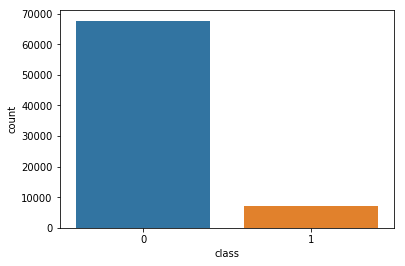

In [212]:
sns.countplot(x="class", data=transactions)

From the above diagram, we can infer that the data is highly imbalanced and any predictions will lead to non-fraudlent decisions. Hence, we need to balance the data using SMOTE library

## Data Processing

In [213]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74691 entries, 0 to 74690
Data columns (total 14 columns):
Column 1                     74691 non-null int64
user_id                      74691 non-null int64
signup_time                  74691 non-null object
purchase_time                74691 non-null object
signup_time-purchase_time    74691 non-null int64
purchase_value               74691 non-null int64
device_id                    74691 non-null object
source                       74691 non-null object
browser                      74691 non-null object
sex                          74691 non-null object
age                          74691 non-null int64
ip_address                   74691 non-null float64
class                        74691 non-null int64
N[device_id]                 74691 non-null int64
dtypes: float64(1), int64(7), object(6)
memory usage: 8.0+ MB


In [215]:
dataCopy = transactions.copy()

,Column 1,user_id,signup_time,purchase_time,signup_time-purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,N[device_id]
0,149671,285108,07/15/2015 4:36 AM,09/10/2015 2:17 PM,82661,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,2
1,84546,229053,01/07/2015 1:19 PM,01/09/2015 10:12 AM,2693,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,1
2,35978,108439,02/08/2015 9:11 PM,04/09/2015 2:26 PM,85995,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,1
3,103053,178528,04/20/2015 8:19 PM,08/03/2015 8:17 PM,151198,35,HUFZWLDYJPRCK,SEO,Chrome,F,30,2.550204e+09,0,1
4,101025,70424,07/05/2015 4:54 PM,08/25/2015 4:08 PM,73394,43,YDLNPVEWMTMMZ,Direct,IE,M,40,3.310808e+09,0,1


In [0]:
y = transactions["class"]
transactions.drop(columns = ["Column 1", "user_id","device_id","class","signup_time","purchase_time","ip_address"], inplace=True)

In [217]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74691 entries, 0 to 74690
Data columns (total 7 columns):
signup_time-purchase_time    74691 non-null int64
purchase_value               74691 non-null int64
source                       74691 non-null object
browser                      74691 non-null object
sex                          74691 non-null object
age                          74691 non-null int64
N[device_id]                 74691 non-null int64
dtypes: int64(4), object(3)
memory usage: 4.0+ MB


In [0]:
transactions["sex"] = transactions["sex"].map({'M':1,'F':0})

In [219]:
transactions.head(5)

,signup_time-purchase_time,purchase_value,source,browser,sex,age,N[device_id]
0,82661,31,Direct,Chrome,1,49,2
1,2693,29,SEO,Chrome,1,34,1
2,85995,26,Ads,FireFox,1,33,1
3,151198,35,SEO,Chrome,0,30,1
4,73394,43,Direct,IE,1,40,1


Standaradize the integer variables using Standard Scaler and convert the categorical variables into integer by using dummy variable. Both can be done using column transformter

Convert object variables into integer by using dummy variables

In [0]:
all_columns = transactions.columns

In [221]:
num_columns = transactions[['signup_time-purchase_time','purchase_value','age','sex','N[device_id]']]
stdScalar = ss()
stdScalar.fit(num_columns)
scaled_Transactions = stdScalar.transform(num_columns)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [0]:
df_scaledTransactions = pd.DataFrame(scaled_Transactions) #, index=scaled_Transactions.index, columns=num_columns)
df_scaledTransactions.columns = ['signup_time-purchase_time','purchase_value','age','sex','N[device_id]']


In [151]:
type(df_scaledTransactions)

pandas.core.frame.DataFrame

In [0]:
browser_transactions = pd.get_dummies(transactions.browser, prefix='Browser').iloc[:,1:]
source_transactions = pd.get_dummies(transactions.source, prefix='Source').iloc[:,1:]

In [0]:
X_transAndScaledData = pd.concat([df_scaledTransactions, browser_transactions, source_transactions], axis=1)

In [155]:
X_transAndScaledData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74691 entries, 0 to 74690
Data columns (total 11 columns):
signup_time-purchase_time    74691 non-null float64
purchase_value               74691 non-null float64
age                          74691 non-null float64
sex                          74691 non-null float64
N[device_id]                 74691 non-null float64
Browser_FireFox              74691 non-null uint8
Browser_IE                   74691 non-null uint8
Browser_Opera                74691 non-null uint8
Browser_Safari               74691 non-null uint8
Source_Direct                74691 non-null uint8
Source_SEO                   74691 non-null uint8
dtypes: float64(5), uint8(6)
memory usage: 3.3 MB


In [225]:
X_transAndScaledData.head()

,signup_time-purchase_time,purchase_value,age,sex,N[device_id],Browser_FireFox,Browser_IE,Browser_Opera,Browser_Safari,Source_Direct,Source_SEO
0,0.009090,-0.320634,1.835765,0.845428,0.223419,0,0,0,0,1,0
1,-1.525820,-0.429593,0.099640,0.845428,-0.257486,0,0,0,0,0,1
2,0.073083,-0.593031,-0.016102,0.845428,-0.257486,1,0,0,0,0,0
3,1.324593,-0.102717,-0.363327,-1.182833,-0.257486,0,0,0,0,0,1
4,-0.168781,0.333118,0.794090,0.845428,-0.257486,0,1,0,0,1,0


In [226]:
X_transAndScaledData.shape

(74691, 11)

## Data Modelling

In [0]:
X_train, X_test, y_train, y_test,indicies_tr,indicies_test =  train_test_split(X_transAndScaledData,
                                                      y,
                                                      np.arange(X_transAndScaledData.shape[0]),
                                                      train_size = 0.8,
                                                      test_size = 0.2,                                                      
                                                      )

In [307]:
X_train.shape

(59752, 11)

In [347]:
y_train.head()

25277    0
12019    0
9958     0
40334    1
6238     0
Name: class, dtype: int64

In [308]:
dataForCost = dataCopy.iloc[indicies_test]
dataForCost.purchase_value.head()

69232    10
18680    33
49613    26
64125     9
30876    66
Name: purchase_value, dtype: int64

In [309]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)
np.sum(y_res)/len(y_res)

0.5

In [0]:
def PrintStats(cmat, y_test, pred):
   # separate out the confusion matrix components
   tpos = cmat[0][0]
   fneg = cmat[1][0]
   fpos = cmat[0][1]
   tneg = cmat[1][1]
   print(cmat)
  
   print('True Positive:' + str(tpos))
   print('False Negative:' + str(fneg))
   print('False Positive:' + str(fpos))
   print('True Negative:' + str(tneg))
   
   # calculate F!, Recall scores
   f1Score = round(f1_score(y_test, pred), 2)
   recallScore = round(recall_score(y_test, pred), 2)
   # calculate and display metrics  
   print( 'Accuracy: '+ str(np.round(100*float(tpos+fneg)/float(tpos+fneg + fpos + tneg),2))+'%')
   #print( 'Cohen Kappa: '+ str(np.round(cohen_kappa_score(y_test, pred),3)))
   print("Sensitivity/Recall for Model : {recall_score}".format(recall_score = recallScore))
   print("F1 Score for Model : {f1_score}".format(f1_score = f1Score))

In [0]:
def CalculateCost(actual,prediction,data):
  #if model prediction is true, but it is actually false - this will cost $8 per customer
  costofFalsePositive = data.purchase_value[(prediction==1) & (actual==0)].count() * 8  
  print("Cost for false predicition: ${:.0f}".format(costofFalsePositive))
  #if model prediction is false, but it is actually true - this will cost the purchase value
  costofFalseNegative = data.purchase_value[(prediction==0) & (actual==1)].sum()
  print("Cost lost due to wrong predicution: ${:.0f}".format(costofFalseNegative))
  totalCost = costofFalsePositive + costofFalseNegative
  print("total Cost ${:.0f}".format(totalCost))
  
  #return totalCost

**Model # 1 --- Logistic Regression**

In [313]:
lr = LogisticRegression()
lr.fit(X_res, y_res)
Y_pred = lr.predict(X_test)
lr_cnf_matrix = confusion_matrix(y_test, Y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [314]:
PrintStats(lr_cnf_matrix, y_test, Y_pred)


[[12801   778]
 [  467   893]]
True Positive:12801
False Negative:467
False Positive:778
True Negative:893
Accuracy: 88.81%
Sensitivity/Recall for Model : 0.66
F1 Score for Model : 0.59


In [325]:
CalculateCost(y_test,Y_pred,dataForCost)

Cost for false predicition: $6224
Cost lost due to wrong predicution: $17051
total Cost $23275


In [0]:
Y_pred.tofile('test2.csv',sep=',')

**Model # 2 - Decision Trees**

In [0]:
dt = DecisionTreeClassifier()
dt.fit(X_res, y_res)
Y_dt_pred = dt.predict(X_test)
dt_cnf_matrix = confusion_matrix(y_test, Y_dt_pred)

In [329]:
PrintStats(rf_cnf_matrix, y_test, Y_dt_pred)

[[13209   370]
 [  592   768]]
True Positive:13209
False Negative:592
False Positive:370
True Negative:768
Accuracy: 92.38%
Sensitivity/Recall for Model : 0.58
F1 Score for Model : 0.55


In [330]:
CalculateCost(y_test, Y_dt_pred, dataForCost)

Cost for false predicition: $5824
Cost lost due to wrong predicution: $20671
total Cost $26495


**Model # 3 Random Forest**

In [0]:
rf = RandomForestClassifier(n_estimators = 500, n_jobs =4)
rf.fit(X_res, y_res)
Y_rf_pred = rf.predict(X_test)
rf_cnf_matrix = confusion_matrix(y_test, Y_rf_pred)

In [317]:
PrintStats(rf_cnf_matrix, y_test, Y_rf_pred)

[[13209   370]
 [  592   768]]
True Positive:13209
False Negative:592
False Positive:370
True Negative:768
Accuracy: 92.38%
Sensitivity/Recall for Model : 0.56
F1 Score for Model : 0.61


In [332]:
CalculateCost(y_test,Y_rf_pred,dataForCost)

Cost for false predicition: $2960
Cost lost due to wrong predicution: $21526
total Cost $24486


## Data Modeling for test data

Based on the above calculations,  Logistic regression seems to be cost effective compare to other models, however, the accuracy is high for Random Forest that of Logistic regression. Hence, it would be better to go with Logistic regression as it gives more cost effective model.

In [339]:
path = "/content/drive/My Drive/FinalProject/datasetForFinalTest.csv"
testData = pd.read_csv(path)
testData.head()

,Column 1,user_id,signup_time,purchase_time,signup_time-purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,N[device_id]
0,73178,328855,03/11/2015 12:54 AM,04/05/2015 12:23 PM,36689,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,1
1,63154,328496,07/23/2015 12:48 PM,10/20/2015 1:01 PM,128173,40,HTOCRWCBYIQJI,Ads,Safari,M,33,2.185371e+09,1
2,45469,97677,05/11/2015 2:28 AM,07/20/2015 9:37 PM,101949,79,GNVLAANUJMKFC,SEO,Chrome,F,27,2.821272e+09,2
3,64425,272080,06/23/2015 12:15 PM,08/26/2015 1:42 AM,91527,40,NBCCGOYVYSVAV,SEO,FireFox,M,20,1.074954e+09,1
4,125042,341169,03/08/2015 1:08 PM,05/15/2015 6:48 AM,97540,43,YQWZFJBVAAGEI,SEO,IE,M,40,2.981257e+09,1


In [340]:
dataTestCopy = testData.copy()
testData.drop(columns = ["Column 1", "user_id","device_id","signup_time","purchase_time","ip_address"], inplace=True)
testData["sex"] = testData["sex"].map({'M':1,'F':0})
num_columns = testData[['signup_time-purchase_time','purchase_value','age','sex','N[device_id]']]
stdScalar = ss()
stdScalar.fit(num_columns)
scaled_TestTransactions = stdScalar.transform(num_columns)
df_testscaledTransactions = pd.DataFrame(scaled_TestTransactions) #, index=scaled_Transactions.index, columns=num_columns)
df_testscaledTransactions.columns = ['signup_time-purchase_time','purchase_value','age','sex','N[device_id]']
browser_testtransactions = pd.get_dummies(testData.browser, prefix='Browser').iloc[:,1:]
source_testtransactions = pd.get_dummies(testData.source, prefix='Source').iloc[:,1:]
X_testtransAndScaledData = pd.concat([df_testscaledTransactions, browser_testtransactions, source_testtransactions], axis=1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [341]:
X_testtransAndScaledData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13413 entries, 0 to 13412
Data columns (total 11 columns):
signup_time-purchase_time    13413 non-null float64
purchase_value               13413 non-null float64
age                          13413 non-null float64
sex                          13413 non-null float64
N[device_id]                 13413 non-null float64
Browser_FireFox              13413 non-null uint8
Browser_IE                   13413 non-null uint8
Browser_Opera                13413 non-null uint8
Browser_Safari               13413 non-null uint8
Source_Direct                13413 non-null uint8
Source_SEO                   13413 non-null uint8
dtypes: float64(5), uint8(6)
memory usage: 602.6 KB


In [342]:
X_testtransAndScaledData.head()

,signup_time-purchase_time,purchase_value,age,sex,N[device_id],Browser_FireFox,Browser_IE,Browser_Opera,Browser_Safari,Source_Direct,Source_SEO
0,-0.883410,-1.143551,-0.835293,0.840141,-0.258280,0,1,0,0,1,0
1,0.873579,0.176463,-0.015378,0.840141,-0.258280,0,0,0,1,0,0
2,0.369936,2.321485,-0.718163,-1.190276,0.214921,0,0,0,0,0,1
3,0.169777,0.176463,-1.538078,0.840141,-0.258280,1,0,0,0,0,1
4,0.285259,0.341464,0.804537,0.840141,-0.258280,0,1,0,0,0,1


In [349]:
lr = LogisticRegression()
lr.fit(X_res, y_res)
Y_pred = lr.predict(X_testtransAndScaledData)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
Y_pred.tofile("submissionChandrasekaranNageswaran.csv",sep=",")